## Exemplo - Análise Exploratória

Após ter visto diversas ferramentas e opções que podemos utilizar para realizar a análise prévia dos nossos dados, iremos apresentar um exemplo de como é possível seguir um fluxo, de modo a obter informações preliminares que podem ser mostrar bastante importantes para nos orientar nos próximos passos:

Começamos então, com a importação das bibliotecas, configuração do ambiente e importação dos nossos dados:

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/y7/pm7w4m2d63x56zhnz7hjrnzw0000gn/T/ipykernel_1159/3548346989.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
#Criando nosso DataFrame
df = pd.read_excel("datasets/AdventureWorks.xlsx")

In [4]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


Após ter uma visão inicial dos nossos dados, é possível observar quais variáveis podem se mostrar importantes na nossa análise exploratória, a quantidade de dados que temos e se os tipos desses dados estão no formato adequado:

In [5]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

Depois das verificações inciais, é possível responder algumas perguntas, de forma bem simples, tais como:

- Qual foi a receita total?
- Qual foi o custo total da operação?
- Por consequência, qual foi o lucro total?

In [7]:
#Qual a Receita total?
df["Valor Venda"].sum()

5984606.1426

In [10]:
#Qual o custo Total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custo
#Qual o custo Total?
round(df["custo"].sum(), 2)

2486783.05

In [12]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total
#Vamos criar uma coluna de Lucro que será Receita - Custo
df["lucro"]  = df["Valor Venda"] - df["custo"] 
#Total Lucro
round(df["lucro"].sum(),2)

3497823.09

Além disso, podemos olhar também dados para propor uma melhoria operacional. 

Por exemplo, observar quanto tempo se leva em média para realizar a entrega de algum produto, se esse é um tempo grande e se da pra diminuí-lo:

In [13]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [14]:
#Extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [15]:
#Média do tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

Nessa mesma linha, podemos observar qual foi o lucro obtido a partir da venda de produto de cada uma das marcas:

In [16]:
#Vamos Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [17]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


Podemos ainda, mudar a configuração de como são mostrados "números muito grandes":

In [18]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [19]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


Podemos responder outra perguntas também, tais como: 

- Quais produtos foram os mais vendidos?
- Como foram distribuídas as vendas durante um ano ou durante o período total presente no banco de dados?

In [20]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

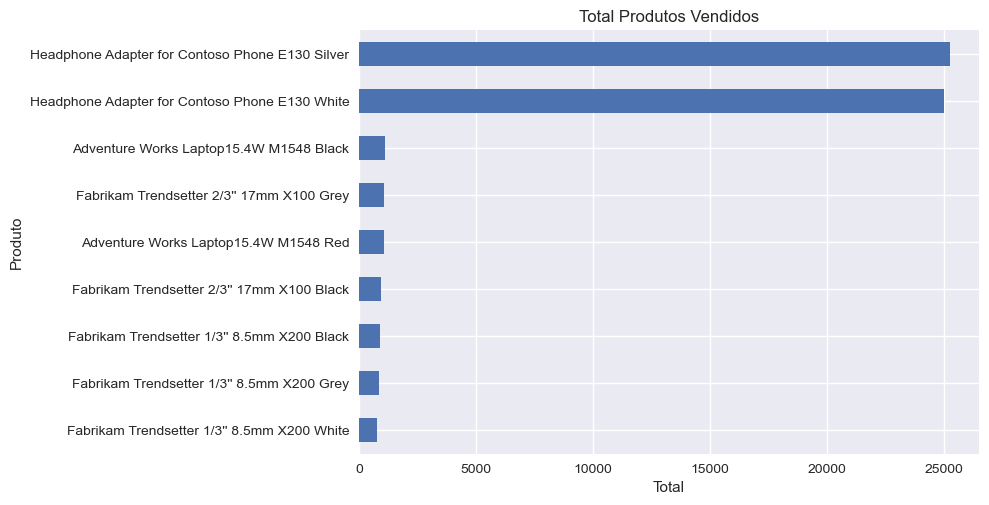

In [21]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

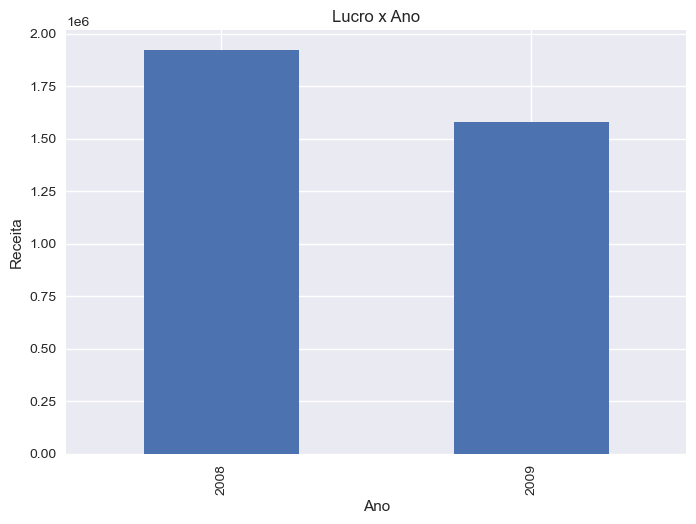

In [22]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [23]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

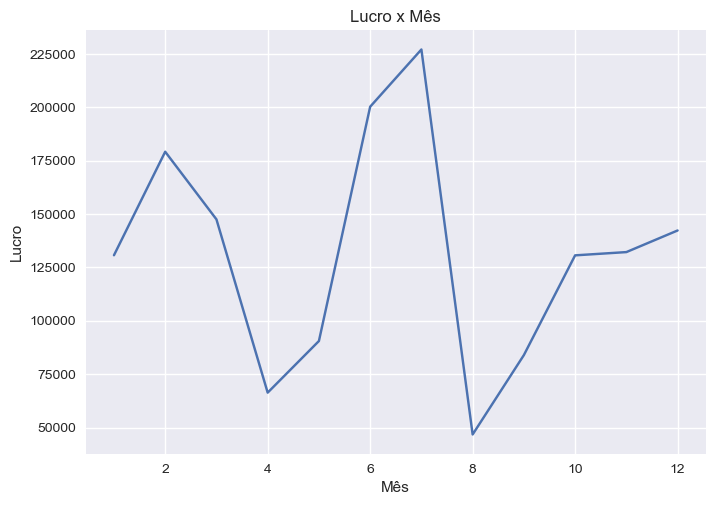

In [24]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

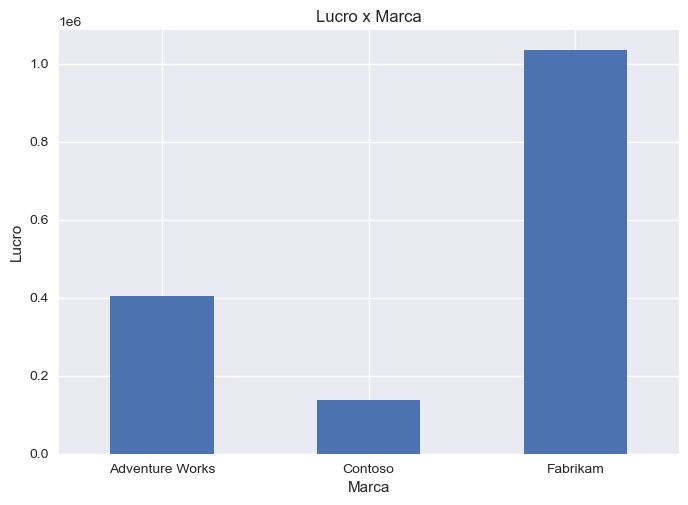

In [26]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

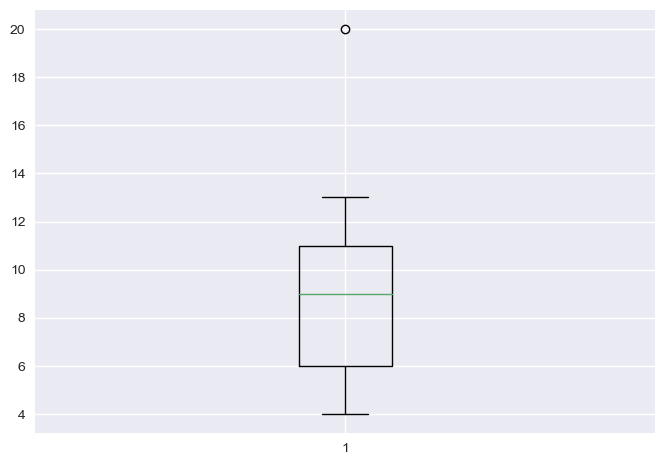

In [27]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

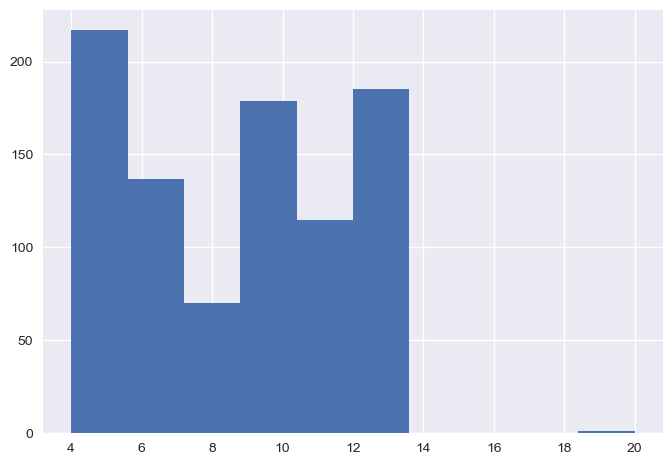

In [28]:
#Histograma
plt.hist(df["Tempo_envio"]);